In [8]:
#Подключение библиотек
import numpy as np #для обработки массиво
import pandas as pd #для анализа данных
import matplotlib.pyplot as plt #для гистограмм, диаграмм
import scipy #для математических процедур

In [2]:
PATH = "data.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252') #чтение файла csv в объект dataframe
df = raw_df.copy() #создание копии

df.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


В основе проверки на "нормальность" лежит проверка гипотез.
- Нулевая гепотеза - данные распределены нормально
- Альтернативная гепотеза - данные не имеют нормального распределения

#### Шапиро-Уилк
Проведем первый критерий, возвращающий значение вычисленной статистики и р-значение. В качестве критического значения в большинстве случаев берется 0,05. При значении меньше 0,05 мы вынуждены отклонить нулевую гипотезу.

In [3]:
df.describe() #статистические характеристики

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Второй тест по критерию согласия Пирсона, который тоже возвращает соответствующее значение статистики и р-значение

K'2-тест Д'Агостино вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения

In [40]:
ks_test = stats.kstest(df['price'],'norm')
shapiron_test = stats.shapiro(df['price'])
normaltest_test = stats.normaltest(df['price'],axis=0)
print('ks_test: ',ks_test)
print('shapiron_test: ',shapiron_test)
print('normaltest_test: ',normaltest_test)

ks_test:  KstestResult(statistic=0.9893478260869565, pvalue=0.0)
shapiron_test:  ShapiroResult(statistic=0.3806490898132324, pvalue=0.0)
normaltest_test:  NormaltestResult(statistic=11157.561434468633, pvalue=0.0)


* Если значение P теста Шапиро Уилка больше 0,05, мы предполагаем нормальное распределение.
* Если значение P теста Шапиро Уилка меньше 0,05, мы не предполагаем нормального распределения.

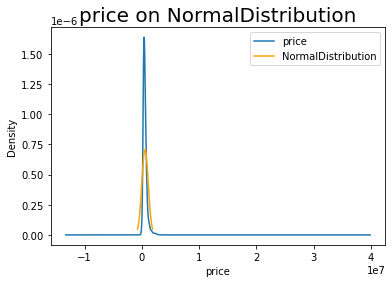

In [39]:
# Нарисуйте кривую нормального распределения
age = df['price']
plt.figure()
age.plot(kind='kde') 

# Нормальное распределение необработанных данных
M_S = stats.norm.fit(age)  

# Нормальное распределение соответствует среднему местоположению, шкале стандартного отклонения
normalDistribution = stats.norm(M_S[0],M_S[1]) 
 
# Нарисовать подобранный график нормального распределения
x= np.linspace(normalDistribution.ppf(0.01),normalDistribution.ppf(0.99),100)
plt.plot(x,normalDistribution.pdf(x),c='orange')
plt.xlabel('price')
plt.title('price on NormalDistribution', size = 20)
plt.legend(['price','NormalDistribution'])
plt.show()